In [9]:
import pandas as pd
import os


folder_path = "./"  

all_data = []


for month in range(1, 13):

    file_name = f"MBTA-Bus-Arrival-Departure-Times_2022-{month:02d}.csv"
    file_path = os.path.join(folder_path, file_name)
    

    if os.path.exists(file_path):

        df = pd.read_csv(file_path)

        df = df.drop(columns=['scheduled_headway', 'headway'])
        df_filtered = df[df['route_id'] == '01']
        all_data.append(df_filtered)
    else:
        print(f"Файл {file_name} не найден.")
combined_data = pd.concat(all_data, ignore_index=True)

combined_data.to_csv("01route0112.csv", index=False)

print("Все данные собраны и сохранены в '01route0112.csv'.")


Все данные собраны и сохранены в '01route0112.csv'.


In [14]:

df.info()
df.isnull().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731278 entries, 0 to 731277
Data columns (total 11 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   service_date      731278 non-null  object 
 1   route_id          731278 non-null  int64  
 2   direction_id      731278 non-null  object 
 3   half_trip_id      730796 non-null  float64
 4   stop_id           731278 non-null  float64
 5   time_point_id     731278 non-null  object 
 6   time_point_order  731190 non-null  float64
 7   point_type        731278 non-null  object 
 8   standard_type     731190 non-null  object 
 9   scheduled         731278 non-null  object 
 10  actual            677822 non-null  object 
dtypes: float64(3), int64(1), object(7)
memory usage: 61.4+ MB


service_date            0
route_id                0
direction_id            0
half_trip_id          482
stop_id                 0
time_point_id           0
time_point_order       88
point_type              0
standard_type          88
scheduled               0
actual              53456
dtype: int64

In [37]:
# удаление пустых значений
mport pandas as pd

# Загрузка данных
df = pd.read_csv("01route0112.csv")

df['scheduled'] = pd.to_datetime(df['scheduled'], errors='coerce')
df['actual'] = pd.to_datetime(df['actual'], errors='coerce')

df_cleaned = df.dropna()
df_cleaned = df_cleaned.dropna(subset=['actual'])

df_cleaned.to_csv("cl.csv", index=False)

print(f"Оставшиеся строки: {df_cleaned.shape[0]}")
print("Очищенные данные сохранены в 'cl.csv'.")
print(df_cleaned.head())


Оставшиеся строки: 624294
Очищенные данные сохранены в '01route0112_cleaned.csv'.
  service_date  route_id direction_id  half_trip_id  stop_id time_point_id  \
0   2022-01-01         1      Inbound    54137355.0    110.0         hhgat   
1   2022-01-01         1      Inbound    54137355.0     67.0         maput   
2   2022-01-01         1      Inbound    54137355.0     72.0         cntsq   
3   2022-01-01         1      Inbound    54137355.0     75.0           mit   
4   2022-01-01         1      Inbound    54137355.0     79.0         hynes   

   time_point_order  point_type standard_type           scheduled  \
0               1.0  Startpoint      Schedule 1900-01-01 06:05:00   
1               2.0    Midpoint      Schedule 1900-01-01 06:09:00   
2               3.0    Midpoint      Schedule 1900-01-01 06:12:00   
3               4.0    Midpoint      Schedule 1900-01-01 06:15:00   
4               5.0    Midpoint      Schedule 1900-01-01 06:19:00   

               actual  
0 1900-01-

In [56]:
#Преобразование даты и времени
import pandas as pd

df = pd.read_csv("cl.csv")
df['service_date'] = pd.to_datetime(df['service_date'], errors='coerce')

df['scheduled'] = pd.to_datetime(df['scheduled'], errors='coerce').dt.time
df['actual'] = pd.to_datetime(df['actual'], errors='coerce').dt.time

df['scheduled'] = df.apply(
    lambda row: pd.Timestamp.combine(row['service_date'].date(), row['scheduled']) if pd.notnull(row['scheduled']) else None,
    axis=1
)
df['actual'] = df.apply(
    lambda row: pd.Timestamp.combine(row['service_date'].date(), row['actual']) if pd.notnull(row['actual']) else None,
    axis=1
)

print(df[['service_date', 'scheduled', 'actual']].head())

df.to_csv("updated_data.csv", index=False)
print("Обработанные данные сохранены в 'updated_data.csv'.")


  service_date           scheduled              actual
0   2022-01-01 2022-01-01 06:05:00 2022-01-01 06:24:56
1   2022-01-01 2022-01-01 06:09:00 2022-01-01 06:27:46
2   2022-01-01 2022-01-01 06:12:00 2022-01-01 06:32:16
3   2022-01-01 2022-01-01 06:15:00 2022-01-01 06:35:03
4   2022-01-01 2022-01-01 06:19:00 2022-01-01 06:38:10
Обработанные данные сохранены в 'updated_data.csv'.


In [40]:
#подсчет данных
count = len(df_cleaned['time_point_order'])
print(f"Количество данных в столбце 'time_point_order': {count}")


Количество данных в столбце 'time_point_order': 624294


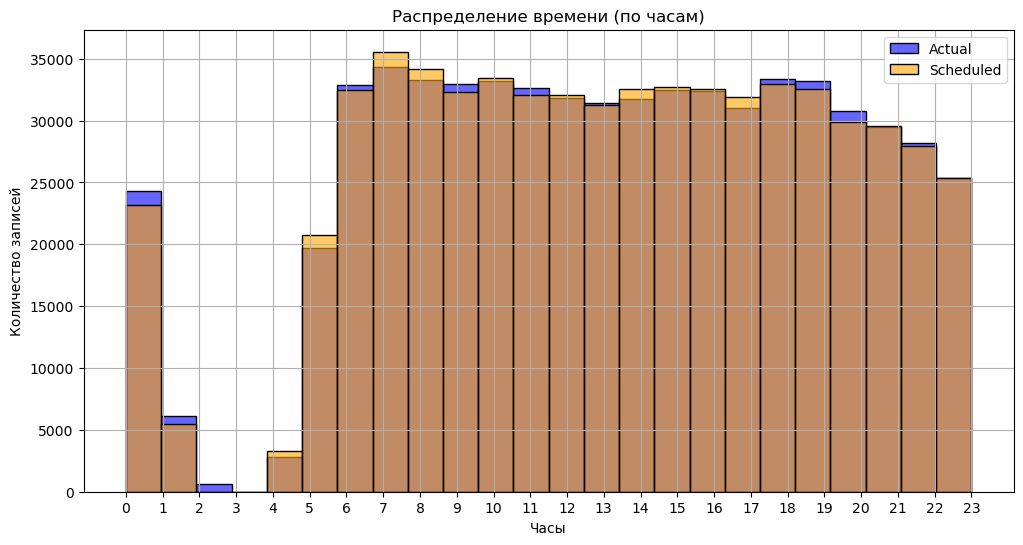

In [64]:
# график относительно sheduled and predicted
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("updated_data.csv")

df['actual'] = pd.to_datetime(df['actual'], errors='coerce')
df['scheduled'] = pd.to_datetime(df['scheduled'], errors='coerce')

df['actual_hour'] = df['actual'].dt.hour
df['scheduled_hour'] = df['scheduled'].dt.hour

plt.figure(figsize=(12, 6))
sns.histplot(df['actual_hour'], bins=24, kde=False, color='blue', label='Actual', alpha=0.6)
sns.histplot(df['scheduled_hour'], bins=24, kde=False, color='orange', label='Scheduled', alpha=0.6)
plt.title("Распределение времени (по часам)")
plt.xlabel("Часы")
plt.ylabel("Количество записей")
plt.xticks(range(0, 24))
plt.legend()
plt.grid(True)
plt.show()


=== Описательная статистика ===
                         service_date  route_id direction_id  half_trip_id  \
count                          624294  624294.0       624294  6.242940e+05   
unique                            NaN       NaN            2           NaN   
top                               NaN       NaN     Outbound           NaN   
freq                              NaN       NaN       312267           NaN   
mean    2022-06-14 06:04:34.232333056       1.0          NaN  5.550269e+07   
min               2022-01-01 00:00:00       1.0          NaN  4.003448e+07   
25%               2022-03-22 00:00:00       1.0          NaN  5.493483e+07   
50%               2022-06-14 00:00:00       1.0          NaN  5.585814e+07   
75%               2022-09-05 00:00:00       1.0          NaN  5.677603e+07   
max               2022-11-30 00:00:00       1.0          NaN  5.772093e+07   
std                               NaN       0.0          NaN  2.689844e+06   

              stop_id time_poin

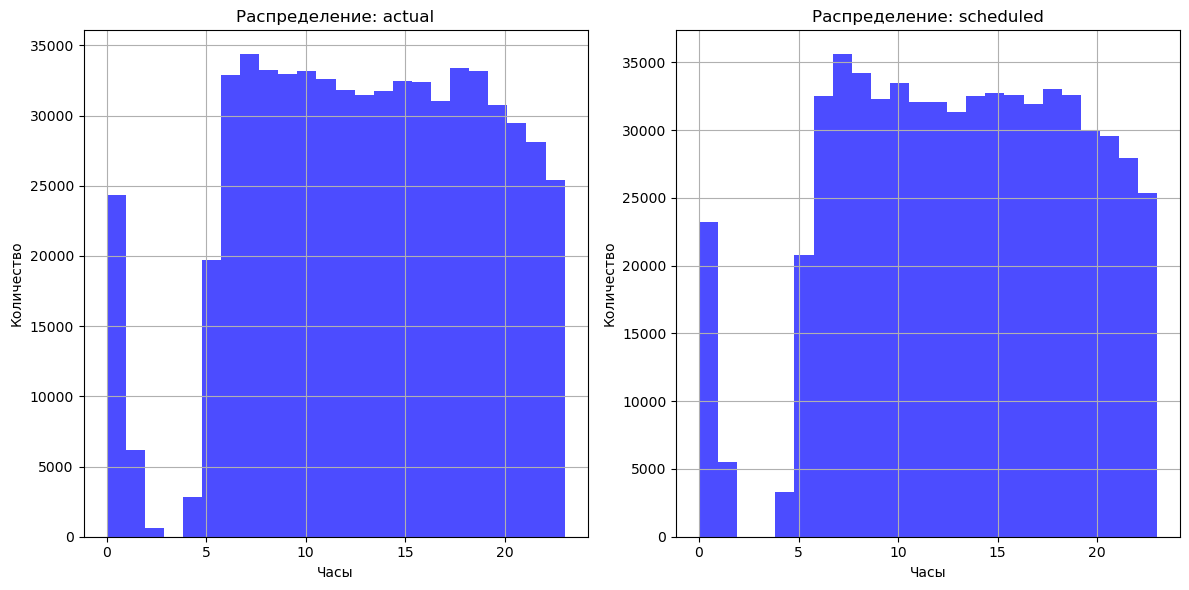

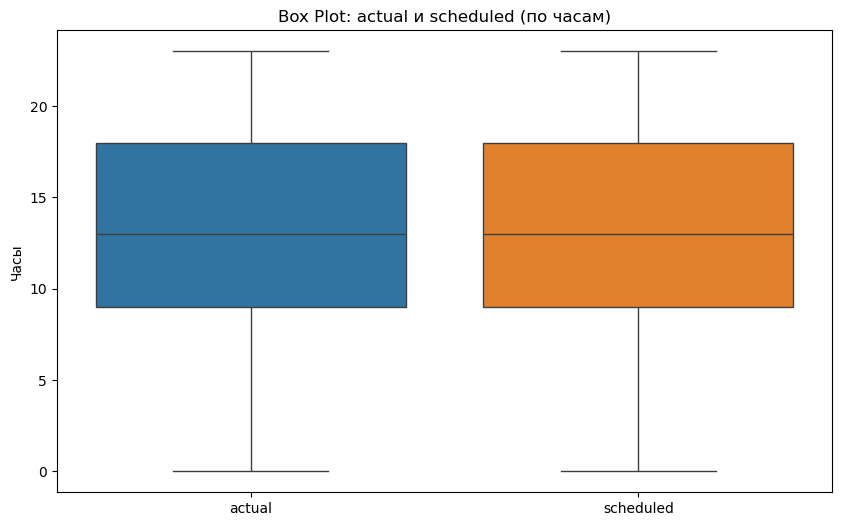

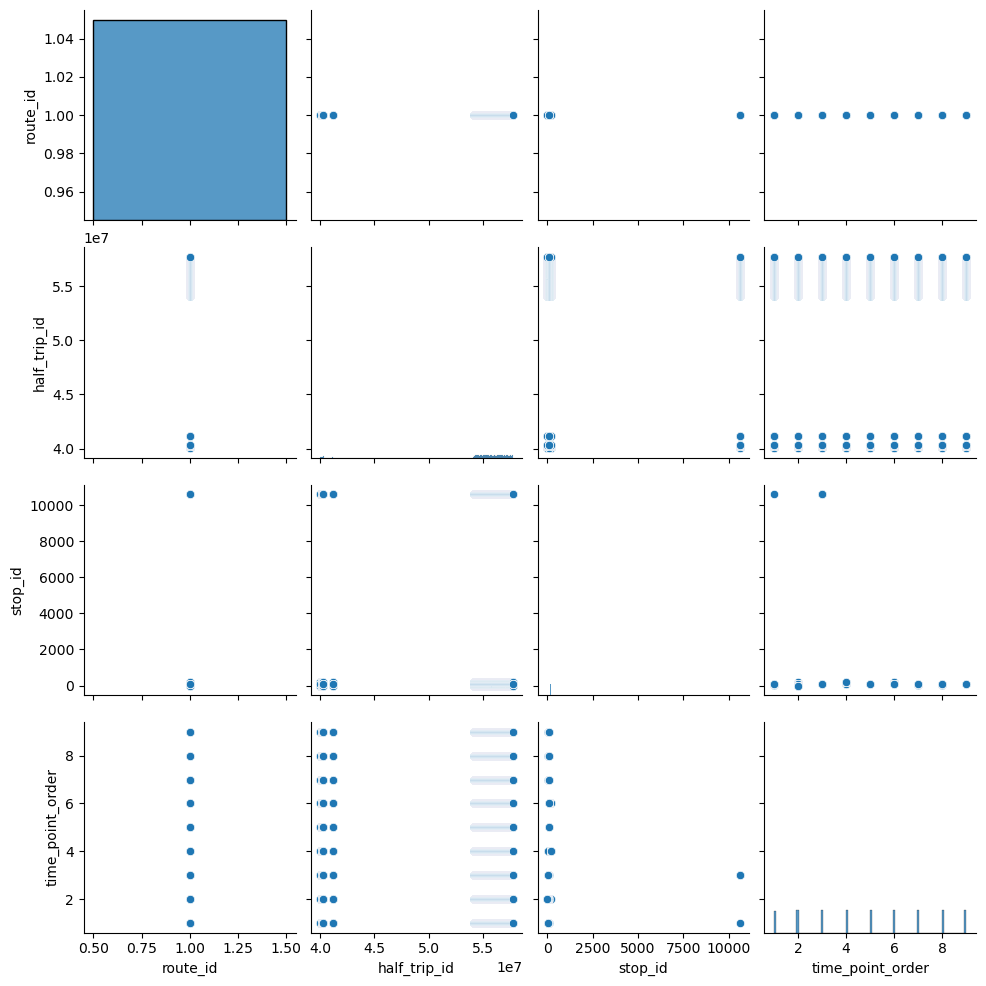

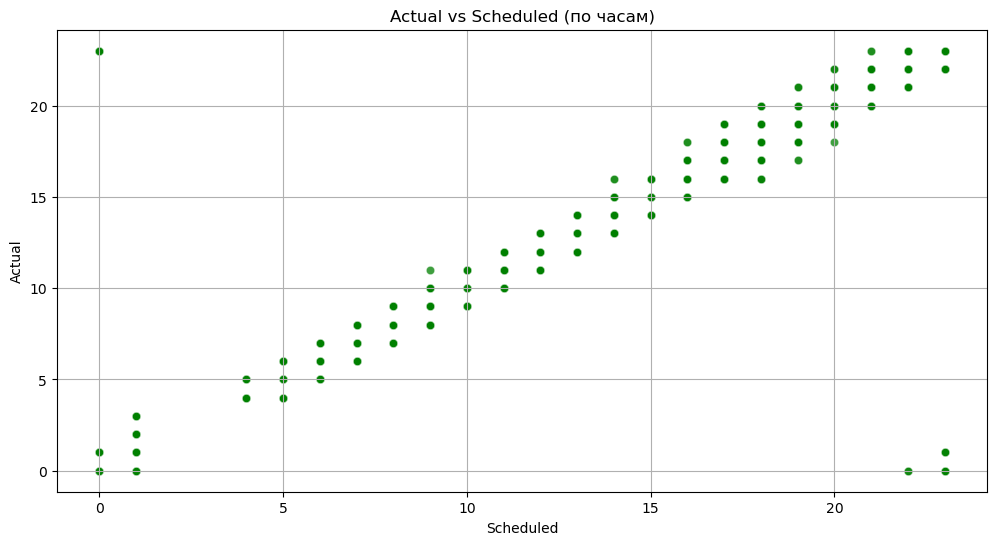

=== Доля пропущенных значений ===
service_date        0.0
route_id            0.0
direction_id        0.0
half_trip_id        0.0
stop_id             0.0
time_point_id       0.0
time_point_order    0.0
point_type          0.0
standard_type       0.0
scheduled           0.0
actual              0.0
dtype: float64

=== Уникальные значения в категориальных колонках ===
direction_id: 2 уникальных значений
time_point_id: 10 уникальных значений
point_type: 3 уникальных значений
standard_type: 2 уникальных значений

=== Среднее, медиана, стандартное отклонение для численных колонок ===
Среднее:
service_date        2022-06-14 06:04:34.232333056
route_id                                      1.0
half_trip_id                      55502692.081242
stop_id                                665.705957
time_point_order                         5.011527
scheduled           2022-06-14 19:46:51.005103616
actual              2022-06-14 19:47:11.853618688
Name: mean, dtype: object

Медиана:
route_id            

In [67]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv("updated_data.csv")

# Преобразуем колонки `actual`, `scheduled`, и `service_date` в формат datetime
df['actual'] = pd.to_datetime(df['actual'], errors='coerce')
df['scheduled'] = pd.to_datetime(df['scheduled'], errors='coerce')
df['service_date'] = pd.to_datetime(df['service_date'], errors='coerce')

print("=== Описательная статистика ===")
print(df.describe(include='all'))

# 1. Распределение данных (гистограммы)
columns_to_plot = ['actual', 'scheduled']
plt.figure(figsize=(12, 6))
for i, col in enumerate(columns_to_plot):
    plt.subplot(1, 2, i + 1)
    df[col].dropna().dt.hour.hist(bins=24, color='blue', alpha=0.7)
    plt.title(f"Распределение: {col}")
    plt.xlabel("Часы")
    plt.ylabel("Количество")
plt.tight_layout()
plt.show()

# 2. Box Plot для анализа выбросов
plt.figure(figsize=(10, 6))
sns.boxplot(data=df[['actual', 'scheduled']].apply(lambda col: col.dt.hour if col.dtype == 'datetime64[ns]' else col))
plt.title("Box Plot: actual и scheduled (по часам)")
plt.ylabel("Часы")
plt.show()

# 3. Парный график (Pair Plot) для численных переменных
numerical_cols = ['route_id', 'half_trip_id', 'stop_id', 'time_point_order']
sns.pairplot(df[numerical_cols].dropna())
plt.show()

# 4. Анализ распределения и выбросов (Actual vs Scheduled)
plt.figure(figsize=(12, 6))
sns.scatterplot(x=df['scheduled'].dt.hour, y=df['actual'].dt.hour, alpha=0.5, color='green')
plt.title("Actual vs Scheduled (по часам)")
plt.xlabel("Scheduled")
plt.ylabel("Actual")
plt.grid(True)
plt.show()

print("=== Доля пропущенных значений ===")
missing_values = df.isnull().sum() / len(df) * 100
print(missing_values)

print("\n=== Уникальные значения в категориальных колонках ===")
for col in df.select_dtypes(include='object').columns:
    print(f"{col}: {df[col].nunique()} уникальных значений")


print("\n=== Среднее, медиана, стандартное отклонение для численных колонок ===")
stats = df.describe()
mean = stats.loc['mean']
median = df.median(numeric_only=True)
std_dev = stats.loc['std']
print(f"Среднее:\n{mean}\n")
print(f"Медиана:\n{median}\n")
print(f"Стандартное отклонение:\n{std_dev}\n")


In [74]:
## Создание столбца time_difference (разница в минутах)
import pandas as pd

df = pd.read_csv("updated_data.csv")

df['scheduled'] = pd.to_datetime(df['scheduled'])
df['actual'] = pd.to_datetime(df['actual'])


df['time_difference'] = (df['actual'] - df['scheduled']).dt.total_seconds() / 60

print(df[['scheduled', 'actual', 'time_difference']].head())
df.to_csv("updated_with_time_difference.csv", index=False)

print("Обновленный датасет сохранен в 'updated_with_time_difference.csv'.")

            scheduled              actual  time_difference
0 2022-01-01 06:05:00 2022-01-01 06:24:56        19.933333
1 2022-01-01 06:09:00 2022-01-01 06:27:46        18.766667
2 2022-01-01 06:12:00 2022-01-01 06:32:16        20.266667
3 2022-01-01 06:15:00 2022-01-01 06:35:03        20.050000
4 2022-01-01 06:19:00 2022-01-01 06:38:10        19.166667
Обновленный датасет сохранен в 'updated_with_time_difference.csv'.


In [92]:
#поиск максимального значения
import pandas as pd

df = pd.read_csv("updated_with_time_difference.csv")

if 'time_difference' in df.columns:
    df['time_difference'] = df['time_difference'].apply(
        lambda x: x / 1000 if x > 1000 or x < -1000 else x
    )

    max_value = df['time_difference'].max()
    min_value = df['time_difference'].min()

    print(f"Максимальное значение в столбце 'time_difference': {max_value} минут")
    print(f"Минимальное значение в столбце 'time_difference': {min_value} минут")

    df.to_csv("updated_time_difference_corrected.csv", index=False)
    print("Измененный датасет сохранен в 'updated_time_difference_corrected.csv'.")
else:
    print("Столбец 'time_difference' не найден в датасете.")


Максимальное значение в столбце 'time_difference': 108.9 минут
Минимальное значение в столбце 'time_difference': -91.01666666666668 минут
Измененный датасет сохранен в 'updated_time_difference_corrected.csv'.


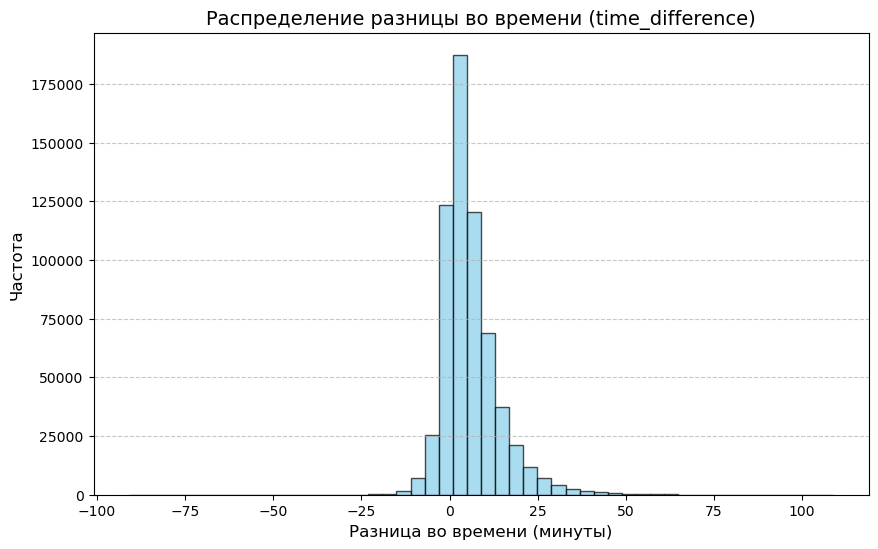

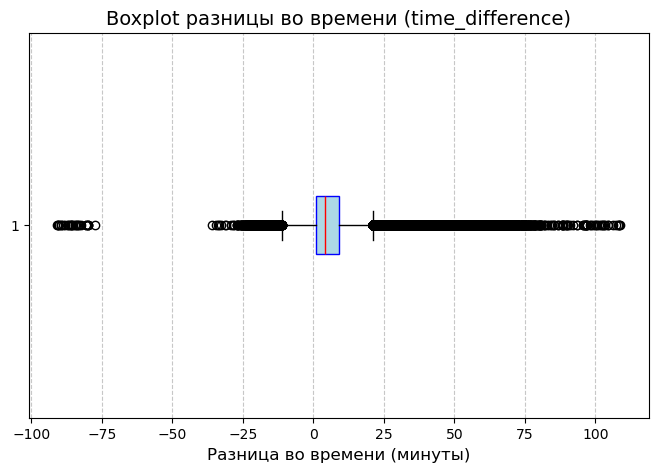

In [95]:
#график распределения разнциы(time_difference)
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("updated_time_difference_corrected.csv")
if 'time_difference' in df.columns:

    plt.figure(figsize=(10, 6))
    plt.hist(df['time_difference'], bins=50, color='skyblue', edgecolor='black', alpha=0.7)
    plt.title("Распределение разницы во времени (time_difference)", fontsize=14)
    plt.xlabel("Разница во времени (минуты)", fontsize=12)
    plt.ylabel("Частота", fontsize=12)
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.show()
 
    plt.figure(figsize=(8, 5))
    plt.boxplot(df['time_difference'].dropna(), vert=False, patch_artist=True,
                boxprops=dict(facecolor="lightblue", color="blue"),
                medianprops=dict(color="red"))
    plt.title("Boxplot разницы во времени (time_difference)", fontsize=14)
    plt.xlabel("Разница во времени (минуты)", fontsize=12)
    plt.grid(axis='x', linestyle='--', alpha=0.7)
    plt.show()
else:
    print("Столбец 'time_difference' не найден в датасете.")


In [107]:
#модель рандом форест регрессия
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score


df = pd.read_csv("updated_time_difference_corrected.csv")


df = df.dropna()


features = ['route_id', 'direction_id', 'stop_id', 'time_point_order']
X = df[features]
y = df['time_difference']

label_encoders = {}
for col in X.select_dtypes(include='object').columns:
    le = LabelEncoder()
    X[col] = le.fit_transform(X[col])
    label_encoders[col] = le


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


model = RandomForestRegressor(random_state=42)
model.fit(X_train, y_train)


y_pred = model.predict(X_test)


mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse}")
print(f"Mean Absolute Error (MAE): {mae}")
print(f"R^2 Score: {r2}")


C:\Users\tkara\AppData\Local\Temp\ipykernel_1940\2540040507.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[col] = le.fit_transform(X[col])


Mean Squared Error (MSE): 59.88880807498129
Mean Absolute Error (MAE): 5.383708042023139
R^2 Score: 0.059140177431504126


In [109]:
#создание колонки статус
import pandas as pd


df = pd.read_csv("updated_time_difference_corrected.csv")


def classify_punctuality(diff):
    if diff < -5:
        return "Early"
    elif -5 <= diff <= 5:
        return "On Time"
    else:
        return "Late"

df['status'] = df['time_difference'].apply(classify_punctuality)


df.to_csv("updated_with_status.csv", index=False)

print(df[['time_difference', 'status']].head())


   time_difference status
0        19.933333   Late
1        18.766667   Late
2        20.266667   Late
3        20.050000   Late
4        19.166667   Late


Accuracy: 1.0

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      3921
           1       1.00      1.00      1.00     54808
           2       1.00      1.00      1.00     66130

    accuracy                           1.00    124859
   macro avg       1.00      1.00      1.00    124859
weighted avg       1.00      1.00      1.00    124859


Confusion Matrix:
 [[ 3921     0     0]
 [    0 54808     0]
 [    0     0 66130]]


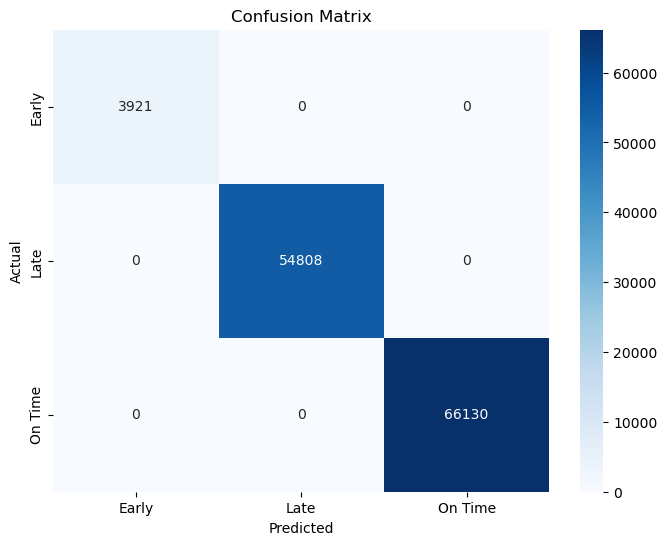

In [112]:
#сощздание модели логистической регрессии

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt


df = pd.read_csv("updated_with_status.csv")


label_encoder = LabelEncoder()
df['status_encoded'] = label_encoder.fit_transform(df['status'])


X = df[['time_difference']]  
y = df['status_encoded']     


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LogisticRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)


print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))

conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()


C:\Users\tkara\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [17:30:14] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Accuracy: 0.9996235753930434

Classification Report:
               precision    recall  f1-score   support

           0       0.99      1.00      0.99      3921
           1       1.00      1.00      1.00     54808
           2       1.00      1.00      1.00     66130

    accuracy                           1.00    124859
   macro avg       1.00      1.00      1.00    124859
weighted avg       1.00      1.00      1.00    124859


Confusion Matrix:
 [[ 3921     0     0]
 [    0 54808     0]
 [   47     0 66083]]


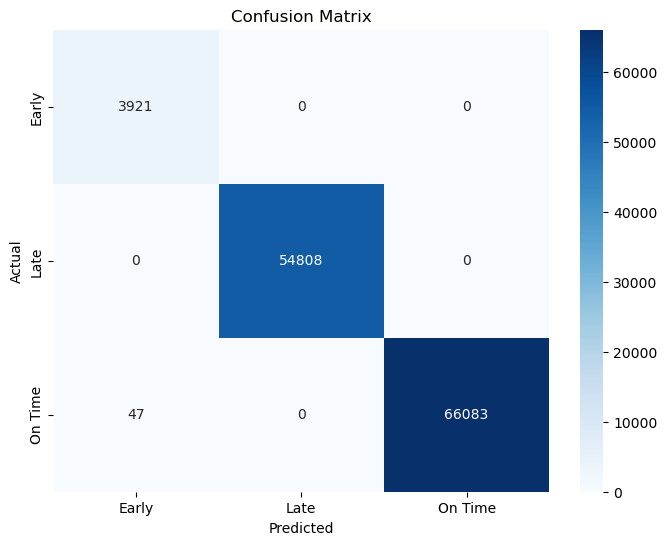

In [117]:
#создание модели xgboost
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv("updated_with_status.csv")

label_encoder = LabelEncoder()
df['status_encoded'] = label_encoder.fit_transform(df['status'])

X = df[['time_difference']]  
y = df['status_encoded']     


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


model = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', random_state=42)
model.fit(X_train, y_train)

y_pred.predict(X_tes
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pre
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()


In [4]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# Загрузка данных
df = pd.read_csv("updated_with_status.csv")
df = df.dropna()

# Определение признаков и целевой переменной
features = ['route_id', 'direction_id', 'stop_id', 'time_point_order']
target = 'time_difference'

# Кодирование категориальных признаков
label_encoders = {}
for col in ['direction_id']:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

# Масштабирование данных
X = df[features].values
y = df[target].values

scaler_X = MinMaxScaler()
scaler_y = MinMaxScaler()

X_scaled = scaler_X.fit_transform(X)
y_scaled = scaler_y.fit_transform(y.reshape(-1, 1))

# Преобразование X для LSTM
X_scaled = X_scaled.reshape(X_scaled.shape[0], 1, X_scaled.shape[1])

# Разделение данных на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_scaled, test_size=0.2, random_state=42)

# Создание LSTM модели
model = Sequential([
    LSTM(50, activation='relu', input_shape=(1, X_scaled.shape[2])),
    Dense(25, activation='relu'),
    Dense(1)
])

# Компиляция и обучение модели
model.compile(optimizer='adam', loss='mse')
model.fit(X_train, y_train, epochs=20, batch_size=32, validation_data=(X_test, y_test))

# Предсказания
y_pred_scaled = model.predict(X_test)
y_pred = scaler_y.inverse_transform(y_pred_scaled)
y_test_actual = scaler_y.inverse_transform(y_test)

# Вычисление RMSE и R^2
rmse = np.sqrt(mean_squared_error(y_test_actual, y_pred))
r2 = r2_score(y_test_actual, y_pred)

# Вывод результатов
print("LSTM Model Results:")
print(f"RMSE: {rmse}")
print(f"R² Score: {r2}")


Epoch 1/20


C:\Users\tkara\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


15608/15608 ━━━━━━━━━━━━━━━━━━━━ 53s 3ms/step - loss: 0.0040 - val_loss: 0.0015
Epoch 2/20
15608/15608 ━━━━━━━━━━━━━━━━━━━━ 50s 3ms/step - loss: 0.0015 - val_loss: 0.0015
Epoch 3/20
15608/15608 ━━━━━━━━━━━━━━━━━━━━ 50s 3ms/step - loss: 0.0015 - val_loss: 0.0015
Epoch 4/20
15608/15608 ━━━━━━━━━━━━━━━━━━━━ 51s 3ms/step - loss: 0.0015 - val_loss: 0.0015
Epoch 5/20
15608/15608 ━━━━━━━━━━━━━━━━━━━━ 57s 4ms/step - loss: 0.0015 - val_loss: 0.0016
Epoch 6/20
15608/15608 ━━━━━━━━━━━━━━━━━━━━ 52s 3ms/step - loss: 0.0015 - val_loss: 0.0015
Epoch 7/20
15608/15608 ━━━━━━━━━━━━━━━━━━━━ 51s 3ms/step - loss: 0.0015 - val_loss: 0.0015
Epoch 8/20
15608/15608 ━━━━━━━━━━━━━━━━━━━━ 39s 3ms/step - loss: 0.0015 - val_loss: 0.0015
Epoch 9/20
15608/15608 ━━━━━━━━━━━━━━━━━━━━ 38s 2ms/step - loss: 0.0015 - val_loss: 0.0015
Epoch 10/20
15608/15608 ━━━━━━━━━━━━━━━━━━━━ 36s 2ms/step - loss: 0.0015 - val_loss: 0.0015
Epoch 11/20
15608/15608 ━━━━━━━━━━━━━━━━━━━━ 37s 2ms/step - loss: 0.0015 - val_loss: 0.0015
Epoch 12